# 📊 Hypothetical Business Case

Foot Locker is preparing for a high-stakes sneaker drop campaign targeting a large list of engaged customers. The marketing team recognizes that subject lines play a crucial role in whether customers open promotional emails, directly impacting engagement and sales potential.

In this competitive market, even a small improvement in open rates can lead to thousands more customers seeing the product and potentially making a purchase. Therefore, the team aims to identify the most effective subject line by running an A/B test comparing two variants:

Variation A: The current standard subject line, “Hurry! Limited pairs remaining.”

Variation B: A new, more urgent and emotive subject line, “Drop alert 🔥 Your exclusive access inside.”

Since the email content remains the same for both groups, the test isolates the effect of subject line wording on open rates.

The business objective is to maximize initial customer attention (opens), thereby increasing the pool of engaged recipients and improving the chances of clicks and conversions downstream. By adopting the winning subject line, Foot Locker can enhance campaign effectiveness, optimize marketing spend, and increase revenue during this critical product launch.

# Exploratory Data Analysis

## Load the data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/content/sneaker_drop_email_ab_data.csv")

## Inspect The Data

In [3]:
# Check shape and missing values
print("Shape:", data.shape)
print("Missing values:\n", data.isna().sum())

# Preview the first few rows
data.head()


Shape: (20000, 4)
Missing values:
 user_id    0
group      0
opened     0
clicked    0
dtype: int64


,user_id,group,opened,clicked
0,1,B,1,0
1,2,A,0,0
2,3,A,0,0
3,4,A,0,0
4,5,B,0,0


## Summarize Engagemenet by Group

In [4]:
summary = (
    data.groupby("group")
        .agg(
            users  = ("user_id", "count"),
            opens  = ("opened", "sum"),
            clicks = ("clicked", "sum")
        )
        .reset_index())

summary["open_rate"] = summary["opens"] / summary["users"]
summary["click_rate"] = summary["clicks"] / summary["users"]
summary["click_to_open_rate"] = summary["click_rate"] / summary["open_rate"]
summary


,group,users,opens,clicks,open_rate,click_rate,click_to_open_rate
0,A,10000,2413,270,0.2413,0.0270,0.111894
1,B,10000,2758,259,0.2758,0.0259,0.093909


## Visualize The Probabilities

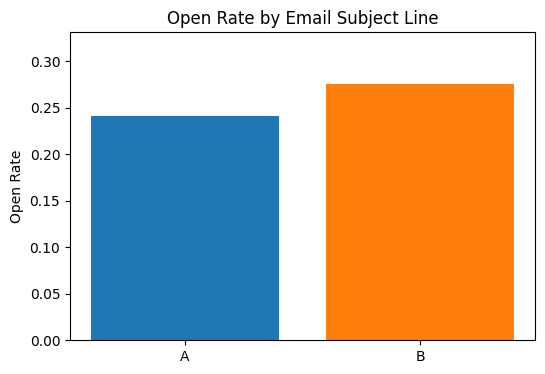

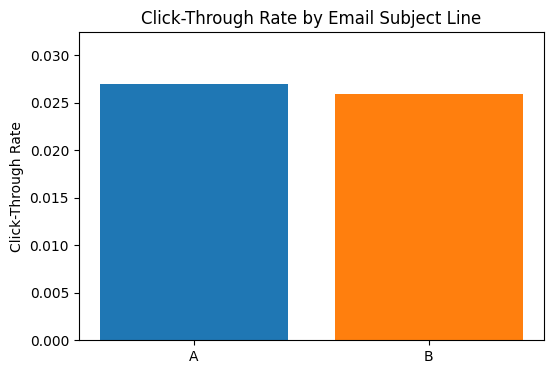

In [5]:
import matplotlib.pyplot as plt

# Open Rate Bar Chart
plt.figure(figsize=(6,4))
plt.bar(summary["group"], summary["open_rate"], color=["#1f77b4", "#ff7f0e"])
plt.title("Open Rate by Email Subject Line")
plt.ylabel("Open Rate")
plt.ylim(0, summary["open_rate"].max() * 1.2)
plt.show()

# Click-Through Rate Bar Chart
plt.figure(figsize=(6,4))
plt.bar(summary["group"], summary["click_rate"], color=["#1f77b4", "#ff7f0e"])
plt.title("Click-Through Rate by Email Subject Line")
plt.ylabel("Click-Through Rate")
plt.ylim(0, summary["click_rate"].max() * 1.2)
plt.show()

# Set Up The Test

### 📧 Email Subject‑Line A/B Test — Open Rate Hypothesis Statement

\
\begin{aligned}
\textbf{Null Hypothesis (}H_{0}\textbf{):}&\quad p_{\text{open},A} = p_{\text{open},B} \\[2pt]
\textbf{Alternative Hypothesis (}H_{1}\textbf{):}&\quad p_{\text{open},A} \neq p_{\text{open},B}
\end{aligned}



\
*Two‑sided test comparing the proportion of recipients who opened Email A vs. Email B.*

In [6]:
# print the summary for reference

print(summary)

  group  users  opens  clicks  open_rate  click_rate  click_to_open_rate
0     A  10000   2413     270     0.2413      0.0270            0.111894
1     B  10000   2758     259     0.2758      0.0259            0.093909


In [7]:
# filter summary table to get group A and B separately
# use iloc to create series to recall easier

a_row = summary[summary['group'] == 'A'].iloc[0]
b_row = summary[summary['group'] == 'B'].iloc[0]

# get the counts and users

opens_A = a_row["opens"]
users_A  = a_row["users"]

print("A users: ", users_A)
print("Opened Email A: ", opens_A,"\n\n")

opens_B = b_row["opens"]
users_B  = b_row["users"]

print("B users: ", users_B)
print("Opened Email B: ", opens_B)

A users:  10000
Opened Email A:  2413 


B users:  10000
Opened Email B:  2758


## Run Two Proportion Z - Test

In [8]:
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm

# counts of "successes" (opens) and "n" (total users) for both groups

opens = [opens_A, opens_B]
n = [users_A, users_B]

# run two-sided z-test to get z-stat and p-value

z_stat, p_value = proportions_ztest(count = opens, nobs = n,
                                    alternative = 'two-sided')

# find the z-critical value

alpha = 0.05
z_critical = norm.ppf(1 - alpha / 2)

print(f"Z-critical value (two-tailed, α = {alpha}): {z_critical:.4f}")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Z-critical value (two-tailed, α = 0.05): 1.9600
Z-statistic: -5.5717
P-value: 0.0000


## Run the Power of the Test

In [9]:
# inputs

p1 = opens_A / users_A
p2 = opens_B / users_B
alpha = 0.05
n = users_A
ratio = users_B / users_A

# effect size for proportions (Cohen's h)

from statsmodels.stats.proportion import proportion_effectsize

effect_size = proportion_effectsize(p1, p2)

# calculate power

from statsmodels.stats.power import NormalIndPower

power = NormalIndPower().power(effect_size = effect_size, nobs1 = n,
                               alpha = alpha, ratio = ratio,
                               alternative = 'two-sided')

print(f"Statistical Power: {power:.4f}")


Statistical Power: 0.9998


## Interpret Results

Criteria:
- if the p-value is low, the null must go
- if the absolute value of the z-stat is greater than the z-crit in a two-tailed test, reject the null

Because the absolute value of the z-statistic is greater than the z-critical value, we reject the null hypothesis that states there is no difference and conclude that the open rates are indeed statistically significant. Meaning there is a statistically significant difference between the subject lines in Email A and Email B.


Because Email B shows a higher open rate (27.58%), it is the preferred subject line for capturing initial attention. Opening an email, however, does not guarantee further engagement such as clicking links inside. Since the email content is identical in both groups, any differences in overall click rates would primarily reflect the differences in open rates.

The statisticla power of 99.98% means that we had more than enough sample size to detect the observed difference. Our test had a really high likelihood of detecting the real effect (difference in open rates), assuming it's truly there.

# Conclusion and Recommendations

Email B's subject line was found to be statistically significant and because it had more open rates than email A's subject line, email B's subject line is the recommended format for initial attention in future email campaigns.

Recommended Next Steps:
- Use email B subject line for all emails (so opens are comparable)

- Create different email content versions (e.g., layout A vs. layout B, or offer 10% off vs. free shipping)

- Run an A/B test comparing click rates and CTOR to see which content drives more clicks among openers and overall email campaign